# <center> IMDb Top 500 movies - Analysis & Visualization <center>

-- Portfolio Project by Samrat Kundu
- linkdin: https://www.linkedin.com/in/samratkundu97/

- The Data is already scraped in the Part 1 of this project.
- This the Part 2: Data Analysis and Visualization
- The Scraped Data was store into a csv file named top500_imdb_movies.csv.

<h2> Project Outline: </h2>

In this project we will perform data analysis and visualization of the TOP 500 IMDb movies.

1. First We Need to import necessary Libraries/Modules
2. Import the Data into a pandas dataframe
3. Data cleaning and Transformation
4. Exploratory Data Analysis & Data Visualization

## 1. Import Necessary Libraries / Modules

In [1]:
# for data reading and manipulation
import pandas as pd
import numpy as np

# for data visuallizaton
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for each plot
plt.style.use("ggplot")

# adding the magic function
%matplotlib inline

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Import the Data into Pandas DataFrame

In [2]:
df = pd.read_csv('top500_imdb_movies.csv')

In [3]:
# first and last five rows of the data set
df

,Unnamed: 0,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
0,0,The Godfather,(1972),A,175 min,"['Crime, Drama']",9.2,100.0,"Don Vito Corleone, head of a mafia family, dec...",['Francis Ford Coppola'],"1,929,034",$134.97M
1,1,The Silence of the Lambs,(1991),A,118 min,"['Crime, Drama, Thriller']",8.6,86.0,A young F.B.I. cadet must receive the help of ...,['Jonathan Demme'],"1,479,099",$130.74M
2,2,Star Wars: Episode V - The Empire Strikes Back,(1980),UA,124 min,"['Action, Adventure, Fantasy']",8.7,82.0,After the Rebels are overpowered by the Empire...,['Irvin Kershner'],"1,331,089",$290.48M
3,3,The Shawshank Redemption,(1994),A,142 min,['Drama'],9.3,82.0,"Over the course of several years, two convicts...",['Frank Darabont'],"2,771,093",$28.34M
4,4,The Shining,(1980),A,146 min,"['Drama, Horror']",8.4,66.0,A family heads to an isolated hotel for the wi...,['Stanley Kubrick'],"1,058,395",$44.02M
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,"Me, Myself & Irene",(2000),A,116 min,['Comedy'],6.6,49.0,A nice-guy cop with Dissociative Identity Diso...,['Bobby Farrelly'],"244,713",$90.57M
496,496,The Darjeeling Limited,(2007),R,91 min,"['Adventure, Comedy, Drama']",7.2,67.0,"A year after their father's funeral, three bro...",['Wes Anderson'],"209,306",$11.90M
497,497,Fear,(1996),Not Rated,97 min,"['Drama, Thriller']",6.2,51.0,"When Nicole met David; handsome, charming, aff...",['James Foley'],"51,603",$20.75M
498,498,Planet Terror,(2007),A,105 min,"['Action, Comedy, Horror']",7.0,NaN,"After an experimental bio-weapon is released, ...",['Robert Rodriguez'],"217,953","217,953"


In [4]:
# Dimmensions
df.shape

(500, 12)

In [5]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    500 non-null    int64  
 1   movie_title   500 non-null    object 
 2   release_year  500 non-null    object 
 3   film_rating   476 non-null    object 
 4   runtime       500 non-null    object 
 5   genre         500 non-null    object 
 6   imdb_rating   500 non-null    float64
 7   metascore     491 non-null    float64
 8   description   500 non-null    object 
 9   director      500 non-null    object 
 10  votes         500 non-null    object 
 11  gross         500 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 47.0+ KB


In [6]:
### Let's check how many null values we have in the dataset
df.isna().sum()

Unnamed: 0       0
movie_title      0
release_year     0
film_rating     24
runtime          0
genre            0
imdb_rating      0
metascore        9
description      0
director         0
votes            0
gross            0
dtype: int64

- The column `film_rating` and `metascore` have 24 and 9 Null Values.
- So Either we Remove or Replace those null values.
- As our Dataset is only contains 500 rows, It's better to replace those null values.

## 3. Data Cleaning and Transformation

Steps:-

1. Drop the `Unnamed: 0` column, which is basically a copy of index.
2. Replace all the null values from `film_rating` and `metascore`.
3. Remove all the brackets '(', ')', '[', ']' and character '$' and Change the datatype according to the variable
5. Add columns if requires

### 3.1 Drop the column `Unnamed: 0`

In [7]:
df = df.drop(columns=(['Unnamed: 0']))

In [8]:
df.head()

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
0,The Godfather,(1972),A,175 min,"['Crime, Drama']",9.2,100.0,"Don Vito Corleone, head of a mafia family, dec...",['Francis Ford Coppola'],"1,929,034",$134.97M
1,The Silence of the Lambs,(1991),A,118 min,"['Crime, Drama, Thriller']",8.6,86.0,A young F.B.I. cadet must receive the help of ...,['Jonathan Demme'],"1,479,099",$130.74M
2,Star Wars: Episode V - The Empire Strikes Back,(1980),UA,124 min,"['Action, Adventure, Fantasy']",8.7,82.0,After the Rebels are overpowered by the Empire...,['Irvin Kershner'],"1,331,089",$290.48M
3,The Shawshank Redemption,(1994),A,142 min,['Drama'],9.3,82.0,"Over the course of several years, two convicts...",['Frank Darabont'],"2,771,093",$28.34M
4,The Shining,(1980),A,146 min,"['Drama, Horror']",8.4,66.0,A family heads to an isolated hotel for the wi...,['Stanley Kubrick'],"1,058,395",$44.02M


### 3.2 Replace the Null Values from `film_rating` and `metascore`

#### `film_rating`

In [9]:
df.film_rating.value_counts()

A            179
UA           120
U             94
R             54
PG-13          6
Not Rated      4
18             4
13             2
15+            2
G              2
UA 16+         2
16             2
PG             1
All            1
7              1
12+            1
Unrated        1
Name: film_rating, dtype: int64

In [10]:
df.film_rating.isna().sum()

24

- As the film rating is a Categorical Column, the most occured value in this variable is 'A'.
- Let's Replace all the Missing Values with 'A'.

In [11]:
df[df.film_rating.isna()]

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
48,Avanti!,(1972),NaN,144 min,"['Comedy, Romance']",7.2,NaN,A successful businessman goes to Italy to arra...,['Billy Wilder'],"11,213",$3.30M
51,Modern Times,(1936),NaN,87 min,"['Comedy, Drama, Romance']",8.5,96.0,The Tramp struggles to live in modern industri...,['Charles Chaplin'],"250,315",$0.16M
115,The Treasure of the Sierra Madre,(1948),NaN,126 min,"['Adventure, Drama, Western']",8.2,98.0,Two down-on-their-luck Americans searching for...,['John Huston'],"128,834",$5.01M
120,The Big Sleep,(1946),NaN,114 min,"['Crime, Film-Noir, Mystery']",7.9,86.0,Private detective Philip Marlowe is hired by a...,['Howard Hawks'],"88,360",$6.54M
122,Mielensäpahoittaja,(2014),NaN,102 min,"['Comedy, Drama']",6.7,NaN,The Grump is a man from the past. A man who kn...,['Dome Karukoski'],"2,806","2,806"
125,8½,(1963),NaN,138 min,['Drama'],8.0,93.0,A harried movie director retreats into his mem...,['Federico Fellini'],"121,787",$0.05M
187,La Cage aux folles,(1978),NaN,97 min,['Comedy'],7.2,61.0,The manager of a Saint-Tropez nightclub featur...,['Édouard Molinaro'],"11,470",$20.42M
216,Fucking Åmål,(1998),NaN,89 min,"['Comedy, Drama, Romance']",7.5,73.0,Two teenage girls in small-town Sweden. Elin i...,['Lukas Moodysson'],"53,986",$0.17M
237,The Bank Job,(2008),NaN,111 min,"['Crime, Drama, Thriller']",7.2,69.0,Martine offers Terry a lead on a foolproof ban...,['Roger Donaldson'],"185,947",$30.06M
243,The Philadelphia Story,(1940),NaN,112 min,"['Comedy, Romance']",7.9,96.0,When a rich woman's ex-husband and a tabloid-t...,['George Cukor'],"71,828","71,828"


In [12]:
df.film_rating = df.film_rating.fillna('A')

#### `Metascore`

In [13]:
df.metascore.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: metascore
Non-Null Count  Dtype  
--------------  -----  
491 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


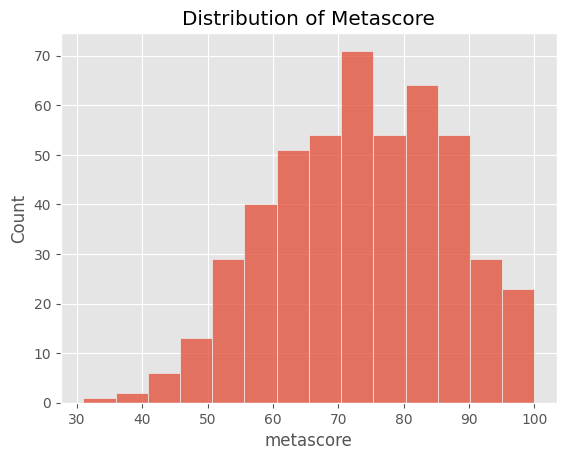

In [14]:
# Plot and histogram of metascore to check how the distribution is..
sns.histplot(df.metascore)
plt.title('Distribution of Metascore');

- The Distribution of Metascore is sightly left skewed

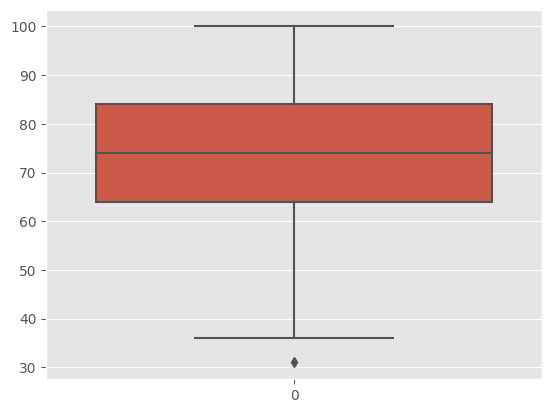

In [15]:
# Let's Create a Box plot of metascore to check the outliers
sns.boxplot(df.metascore);

- As the datatype metascore column is float and this column have an outliear, Let's replace the missing values with Median

In [16]:
df.metascore = df.metascore.fillna(df.metascore.median())

In [17]:
# Check the missing values now
df.isna().sum()

movie_title     0
release_year    0
film_rating     0
runtime         0
genre           0
imdb_rating     0
metascore       0
description     0
director        0
votes           0
gross           0
dtype: int64

- Now there are no missing values in the dataset

### 3.3 Remove all the brackets '(', ')', '[', ']' and character '$' and Change the datatype according to the variable

In [18]:
df.head()

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
0,The Godfather,(1972),A,175 min,"['Crime, Drama']",9.2,100.0,"Don Vito Corleone, head of a mafia family, dec...",['Francis Ford Coppola'],"1,929,034",$134.97M
1,The Silence of the Lambs,(1991),A,118 min,"['Crime, Drama, Thriller']",8.6,86.0,A young F.B.I. cadet must receive the help of ...,['Jonathan Demme'],"1,479,099",$130.74M
2,Star Wars: Episode V - The Empire Strikes Back,(1980),UA,124 min,"['Action, Adventure, Fantasy']",8.7,82.0,After the Rebels are overpowered by the Empire...,['Irvin Kershner'],"1,331,089",$290.48M
3,The Shawshank Redemption,(1994),A,142 min,['Drama'],9.3,82.0,"Over the course of several years, two convicts...",['Frank Darabont'],"2,771,093",$28.34M
4,The Shining,(1980),A,146 min,"['Drama, Horror']",8.4,66.0,A family heads to an isolated hotel for the wi...,['Stanley Kubrick'],"1,058,395",$44.02M


The columns having brackets and special characters are..
- release_year
- genre
- director
- votes
- gross

#### `release_year`

In [19]:
# Check for the unique values
df.release_year.unique()

array(['(1972)', '(1991)', '(1980)', '(1994)', '(1942)', '(1975)',
       '(1981)', '(2003)', '(1977)', '(2008)', '(1974)', '(1986)',
       '(1993)', '(2010)', '(2001)', '(1979)', '(1959)', '(1982)',
       '(1995)', '(1957)', '(2002)', '(1983)', '(1988)', '(1939)',
       '(1976)', '(1954)', '(1985)', '(1941)', '(1990)', '(2000)',
       '(1999)', '(1997)', '(1952)', '(1998)', '(1968)', '(1966)',
       '(1936)', '(1987)', '(2007)', '(2012)', '(2006)', '(2005)',
       '(1944)', '(1996)', '(1958)', '(2014)', '(1949)', '(2015)',
       '(2013)', '(1989)', '(2009)', '(1967)', '(2004)', '(1931)',
       '(1978)', '(1971)', '(1973)', '(1962)', '(1955)', '(1948)',
       '(1992)', '(1960)', '(1946)', '(1963)', '(1951)', '(1984)',
       '(1964)', '(I) (2008)', '(I) (2007)', '(I) (2004)', '(1940)',
       '(2011)', '(I) (2013)', '(1947)', '(1969)', '(I) (2001)',
       '(I) (2006)', '(1971 TV Movie)', '(1961)', '(I) (2011)',
       '(I) (2015)', '(I) (2010)', '(I) (1997)', '(I) (2012)'],
 

- So there are some unwanted values in the release year i.e.. `(I)` , `Movie`, `TV`

In [20]:
# Relpace the Brackets, Movie, TV, and (I) with blank spnace ('')
df.release_year = df.release_year.apply(lambda x: x.replace(')', '').replace('(', '').replace('(I)', '').replace('TV', '').replace('Movie', '').replace(' ',''))

In [21]:
df.release_year.unique()

array(['1972', '1991', '1980', '1994', '1942', '1975', '1981', '2003',
       '1977', '2008', '1974', '1986', '1993', '2010', '2001', '1979',
       '1959', '1982', '1995', '1957', '2002', '1983', '1988', '1939',
       '1976', '1954', '1985', '1941', '1990', '2000', '1999', '1997',
       '1952', '1998', '1968', '1966', '1936', '1987', '2007', '2012',
       '2006', '2005', '1944', '1996', '1958', '2014', '1949', '2015',
       '2013', '1989', '2009', '1967', '2004', '1931', '1978', '1971',
       '1973', '1962', '1955', '1948', '1992', '1960', '1946', '1963',
       '1951', '1984', '1964', 'I2008', 'I2007', 'I2004', '1940', '2011',
       'I2013', '1947', '1969', 'I2001', 'I2006', '1961', 'I2011',
       'I2015', 'I2010', 'I1997', 'I2012'], dtype=object)

- Okay some `I` are left, Let's remove those and convert the column into integer

In [22]:
df.release_year = df.release_year.apply(lambda x: x.replace('I', '')).astype(int)

In [23]:
print(df.release_year.info())
print('-'*70)
print(df.release_year.unique())

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: release_year
Non-Null Count  Dtype
--------------  -----
500 non-null    int32
dtypes: int32(1)
memory usage: 2.1 KB
None
----------------------------------------------------------------------
[1972 1991 1980 1994 1942 1975 1981 2003 1977 2008 1974 1986 1993 2010
 2001 1979 1959 1982 1995 1957 2002 1983 1988 1939 1976 1954 1985 1941
 1990 2000 1999 1997 1952 1998 1968 1966 1936 1987 2007 2012 2006 2005
 1944 1996 1958 2014 1949 2015 2013 1989 2009 1967 2004 1931 1978 1971
 1973 1962 1955 1948 1992 1960 1946 1963 1951 1984 1964 1940 2011 1947
 1969 1961]


- Now the column release_year is cleaned!

#### `genre`

In [24]:
df.genre.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: genre
Non-Null Count  Dtype 
--------------  ----- 
500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [25]:
# unique values 
df.genre.unique()

array(["['Crime, Drama']", "['Crime, Drama, Thriller']",
       "['Action, Adventure, Fantasy']", "['Drama']", "['Drama, Horror']",
       "['Drama, Romance, War']", "['Action, Adventure']",
       "['Action, Adventure, Drama']", "['Action, Crime, Drama']",
       "['Action, Adventure, Sci-Fi']", "['Biography, Drama, History']",
       "['Horror, Sci-Fi']", "['Comedy, Music, Romance']",
       "['Action, Drama, Sci-Fi']", "['Crime, Drama, Mystery']",
       "['Drama, Mystery, War']", "['Action, Sci-Fi']",
       "['Action, Thriller']", "['Adventure, Drama, War']",
       "['Animation, Adventure, Drama']",
       "['Action, Adventure, Mystery']", "['Mystery, Thriller']",
       "['Adventure, Comedy, Sci-Fi']", "['Drama, Mystery']",
       "['Biography, Crime, Drama']", "['Comedy, Drama, Romance']",
       "['Drama, Romance']", "['Comedy, Musical, Romance']",
       "['Drama, War']", "['Adventure, Sci-Fi']",
       "['Action, Crime, Thriller']", "['Comedy, Romance']",
       "['Adventure

In [26]:
# Replace the square brackets and (') with ('')
df.genre = df.genre.apply(lambda x: x.replace('[','').replace(']','').replace("'", ""))

In [27]:
df.genre.value_counts()

Drama                          25
Crime, Drama                   21
Drama, Romance                 21
Crime, Drama, Thriller         19
Comedy, Drama, Romance         18
                               ..
Drama, History, War             1
Animation, Family, Fantasy      1
Drama, Film-Noir, Romance       1
Western                         1
Adventure, Horror, Thriller     1
Name: genre, Length: 147, dtype: int64

- genre is now cleaned! 

#### `director`

In [28]:
# unique values
df.director.unique()

array(["['Francis Ford Coppola']", "['Jonathan Demme']",
       "['Irvin Kershner']", "['Frank Darabont']", "['Stanley Kubrick']",
       "['Michael Curtiz']", "['Milos Forman']", "['Steven Spielberg']",
       "['Peter Jackson']", "['George Lucas']", "['Christopher Nolan']",
       "['James Cameron']", "['Ridley Scott']", "['Billy Wilder']",
       "['David Fincher']", "['Sidney Lumet']", "['Richard Marquand']",
       "['John McTiernan']", "['Victor Fleming']", "['Martin Scorsese']",
       "['Quentin Tarantino']", "['David Lean']", "['Roger Allers']",
       "['Alfred Hitchcock']", "['Luc Besson']", "['Robert Zemeckis']",
       "['Orson Welles']", "['Sam Mendes']", "['James L. Brooks']",
       "['Stanley Donen']", "['Mel Gibson']", "['Barry Levinson']",
       "['Tom Hooper']", "['Sergio Leone']", "['Jean-Pierre Jeunet']",
       "['Charles Chaplin']", "['Sofia Coppola']", "['Darren Aronofsky']",
       "['Ethan Coen']", "['Alfonso Cuarón']", "['Brad Bird']",
       "['Florian Hen

In [29]:
# Replace the square brackets and (') with ('')
df.director = df.director.apply(lambda x: x.replace('[','').replace(']','').replace("'", ""))

In [30]:
# check the unique values again
df.director.unique()

array(['Francis Ford Coppola', 'Jonathan Demme', 'Irvin Kershner',
       'Frank Darabont', 'Stanley Kubrick', 'Michael Curtiz',
       'Milos Forman', 'Steven Spielberg', 'Peter Jackson',
       'George Lucas', 'Christopher Nolan', 'James Cameron',
       'Ridley Scott', 'Billy Wilder', 'David Fincher', 'Sidney Lumet',
       'Richard Marquand', 'John McTiernan', 'Victor Fleming',
       'Martin Scorsese', 'Quentin Tarantino', 'David Lean',
       'Roger Allers', 'Alfred Hitchcock', 'Luc Besson',
       'Robert Zemeckis', 'Orson Welles', 'Sam Mendes', 'James L. Brooks',
       'Stanley Donen', 'Mel Gibson', 'Barry Levinson', 'Tom Hooper',
       'Sergio Leone', 'Jean-Pierre Jeunet', 'Charles Chaplin',
       'Sofia Coppola', 'Darren Aronofsky', 'Ethan Coen',
       'Alfonso Cuarón', 'Brad Bird', 'Florian Henckel von Donnersmarck',
       'James McTeigue', 'Roman Polanski', 'Fernando Meirelles',
       'Howard Hawks', 'Joel Coen', 'Ang Lee', 'Danny Boyle',
       'John Carpenter', 'Car

In [31]:
# Check the value counts
df.director.value_counts()

Steven Spielberg     12
Martin Scorsese       9
Quentin Tarantino     8
Peter Jackson         8
Christopher Nolan     8
                     ..
Jonathan Demme        1
David Mamet           1
Roger Donaldson       1
Stephen Frears        1
Neil Marshall         1
Name: director, Length: 276, dtype: int64

- director column is cleaned now!

#### `votes`

In [32]:
# Check for unique values
df.votes.unique()

array(['1,929,034', '1,479,099', '1,331,089', '2,771,093', '1,058,395',
       '587,663', '1,035,595', '1,004,765', '1,900,873', '1,403,285',
       '2,745,944', '1,312,015', '737,639', '1,395,301', '2,436,924',
       '1,929,235', '910,676', '274,862', '793,988', '1,713,938',
       '686,653', '821,944', '1,715,420', '1,132,155', '1,085,178',
       '906,801', '324,435', '873,822', '2,126,874', '226,998',
       '1,095,089', '336,643', '505,178', '1,198,635', '1,250,961',
       '453,263', '1,202,512', '1,273,320', '1,179,172', '309,185',
       '2,155,260', '250,886', '1,061,452', '1,435,449', '530,131',
       '694,226', '690,944', '1,148,679', '11,213', '782,974', '773,459',
       '250,315', '469,927', '764,060', '867,520', '2,207,234',
       '1,011,099', '1,615,616', '514,050', '776,709', '398,764',
       '1,377,449', '1,146,748', '337,036', '775,861', '36,766',
       '697,114', '648,853', '861,547', '413,492', '704,884', '1,944,990',
       '442,849', '176,421', '632,024', '7

- replace all the commas with blank space and convert the column into integer

In [33]:
df.votes = df.votes.apply(lambda x: x.replace(',','')).astype(int)

In [34]:
df.votes

0      1929034
1      1479099
2      1331089
3      2771093
4      1058395
        ...   
495     244713
496     209306
497      51603
498     217953
499     235303
Name: votes, Length: 500, dtype: int32

- The column vote is cleaned now!

#### `gross`

In [35]:
# check for unique values
df.gross.unique()

array(['$134.97M', '$130.74M', '$290.48M', '$28.34M', '$44.02M', '$1.02M',
       '$112.00M', '$248.16M', '$377.85M', '$322.74M', '$534.86M',
       '$57.30M', '$85.16M', '$96.90M', '$292.58M', '$315.54M', '$78.90M',
       '$25.00M', '$32.87M', '$100.13M', '$83.47M', '$4.36M', '$342.55M',
       '$204.84M', '$309.13M', '$83.01M', '$198.68M', '$28.26M',
       '$107.93M', '$44.91M', '$422.78M', '$13.28M', '$36.76M', '$19.50M',
       '$210.61M', '$1.59M', '$46.84M', '$25.54M', '$130.10M', '$148.48M',
       '$330.25M', '$8.82M', '$75.60M', '$216.54M', '$178.80M',
       '$138.80M', '$56.95M', '$70.10M', '$3.30M', '$6.10M', '$33.23M',
       '$0.16M', '$44.59M', '$46.36M', '$3.64M', '$37.03M', '$74.28M',
       '$162.81M', '$35.55M', '$206.45M', '$11.29M', '$53.09M', '$70.51M',
       '337,036', '$7.56M', '36,766', '$24.61M', '$124.99M', '$141.32M',
       '$3.20M', '$16.50M', '$188.02M', '$13.78M', '$0.45M', '$57.14M',
       '$57.60M', '$32.57M', '$22.46M', '$448.14M', '$936.66M',
   

- Let's remove the `$` sign and `M`.
- Also there are some values not having `M` means those are not in the Million Format
- Let's divide those values with 1000000 (1 M = 10 lakhs) to make those in Million format 

In [36]:
# Let's check those values without $ and M
df.loc[df.gross.str.contains('M') == False]

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
63,Chinatown,1974,UA,130 min,"Drama, Mystery, Thriller",8.2,92.0,A private detective hired to expose an adulter...,Roman Polanski,337036,"337,036"
65,To Have and Have Not,1944,PG,100 min,"Adventure, Comedy, Film-Noir",7.8,90.0,"During World War II, American expatriate Harry...",Howard Hawks,36766,"36,766"
106,The Elephant Man,1980,UA,124 min,"Biography, Drama",8.2,78.0,A Victorian surgeon rescues a heavily disfigur...,David Lynch,249782,"249,782"
109,East of Eden,1955,U,118 min,Drama,7.8,72.0,Two brothers in 1910s California struggle to m...,Elia Kazan,47441,"47,441"
122,Mielensäpahoittaja,2014,A,102 min,"Comedy, Drama",6.7,74.0,The Grump is a man from the past. A man who kn...,Dome Karukoski,2806,"2,806"
131,Who's Afraid of Virginia Woolf?,1966,A,131 min,Drama,8.0,75.0,"A bitter, aging couple, with the help of alcoh...",Mike Nichols,77907,"77,907"
149,Death Proof,2007,A,127 min,"Action, Thriller",7.0,74.0,Two separate sets of voluptuous women are stal...,Quentin Tarantino,303089,"303,089"
174,The Incredible Shrinking Man,1957,A,81 min,"Horror, Sci-Fi",7.6,73.0,When Scott Carey begins to shrink because of e...,Jack Arnold,19037,"19,037"
243,The Philadelphia Story,1940,A,112 min,"Comedy, Romance",7.9,96.0,When a rich woman's ex-husband and a tabloid-t...,George Cukor,71828,"71,828"
261,Rosemary's Baby,1968,A,137 min,"Drama, Horror",8.0,96.0,A young couple trying for a baby moves into an...,Roman Polanski,225037,"225,037"


- As we can clearly see that those gross values are nothing but votes.
- It is possible that some of the movies didn't have the gross value and while scrapping the votes were overwritten in the gross.
- Now we have two option either we remove these values or fill this values with the median of gross

In [37]:
# if the column have 'M' then replace the $ and M with '' else replace with NaN, and convert it to float.
df.gross = df.gross.apply(lambda x: x.replace('$', '').replace('M','') if 'M' in x else np.nan).astype(float)

In [38]:
# replace all the nan values with the median.
df.gross = df.gross.fillna(df.gross.median())

In [39]:
df.gross

0      134.97
1      130.74
2      290.48
3       28.34
4       44.02
        ...  
495     90.57
496     11.90
497     20.75
498     52.63
499     26.02
Name: gross, Length: 500, dtype: float64

- gross is now cleaned!

In [40]:
# Check the information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_title   500 non-null    object 
 1   release_year  500 non-null    int32  
 2   film_rating   500 non-null    object 
 3   runtime       500 non-null    object 
 4   genre         500 non-null    object 
 5   imdb_rating   500 non-null    float64
 6   metascore     500 non-null    float64
 7   description   500 non-null    object 
 8   director      500 non-null    object 
 9   votes         500 non-null    int32  
 10  gross         500 non-null    float64
dtypes: float64(3), int32(2), object(6)
memory usage: 39.2+ KB


- Now only the Runtime is left to convert

#### `runtime`

In [41]:
df.runtime.unique()

array(['175 min', '118 min', '124 min', '142 min', '146 min', '102 min',
       '133 min', '115 min', '201 min', '121 min', '152 min', '202 min',
       '137 min', '195 min', '148 min', '178 min', '117 min', '127 min',
       '147 min', '96 min', '179 min', '131 min', '132 min', '238 min',
       '114 min', '154 min', '161 min', '88 min', '136 min', '112 min',
       '110 min', '116 min', '119 min', '145 min', '113 min', '122 min',
       '139 min', '103 min', '169 min', '149 min', '111 min', '144 min',
       '87 min', '165 min', '109 min', '130 min', '100 min', '98 min',
       '120 min', '128 min', '93 min', '104 min', '129 min', '150 min',
       '188 min', '164 min', '138 min', '134 min', '107 min', '153 min',
       '151 min', '135 min', '157 min', '170 min', '106 min', '108 min',
       '91 min', '183 min', '218 min', '181 min', '143 min', '140 min',
       '126 min', '99 min', '125 min', '212 min', '156 min', '101 min',
       '155 min', '189 min', '162 min', '172 min', '76 min

- Let's remove the min and "'" and change data type into integer

In [42]:
df.runtime = df.runtime.apply(lambda x: x.replace('min', '').replace("'",'').replace(' ','')).astype(int)

In [43]:
df.runtime

0      175
1      118
2      124
3      142
4      146
      ... 
495    116
496     91
497     97
498    105
499     99
Name: runtime, Length: 500, dtype: int32

- runtime is cleaned now!

In [44]:
# fetch the frist 5 rows with the cleaned data
df.head()

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,1929034,134.97
1,The Silence of the Lambs,1991,A,118,"Crime, Drama, Thriller",8.6,86.0,A young F.B.I. cadet must receive the help of ...,Jonathan Demme,1479099,130.74
2,Star Wars: Episode V - The Empire Strikes Back,1980,UA,124,"Action, Adventure, Fantasy",8.7,82.0,After the Rebels are overpowered by the Empire...,Irvin Kershner,1331089,290.48
3,The Shawshank Redemption,1994,A,142,Drama,9.3,82.0,"Over the course of several years, two convicts...",Frank Darabont,2771093,28.34
4,The Shining,1980,A,146,"Drama, Horror",8.4,66.0,A family heads to an isolated hotel for the wi...,Stanley Kubrick,1058395,44.02


In [45]:
# let's export a csv of this cleaned data
df.to_csv('top500_imdb_cleaned.csv', index=False)

## 4. Exploratory Data Analysis

### Numerical Columns

In [46]:
# Statistical view
df.describe()

,release_year,runtime,imdb_rating,metascore,votes,gross
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,1994.798000,123.588000,7.666000,73.574000,4.535495e+05,87.151120
std,16.632814,24.686943,0.591289,13.513317,4.483760e+05,107.938363
min,1931.000000,76.000000,5.600000,31.000000,8.140000e+02,0.010000
25%,1989.000000,105.000000,7.300000,64.000000,1.369442e+05,18.535000
50%,2000.000000,120.000000,7.700000,74.000000,3.032115e+05,52.630000
75%,2006.000000,136.000000,8.100000,84.000000,6.470792e+05,116.047500
max,2015.000000,238.000000,9.300000,100.000000,2.771093e+06,936.660000


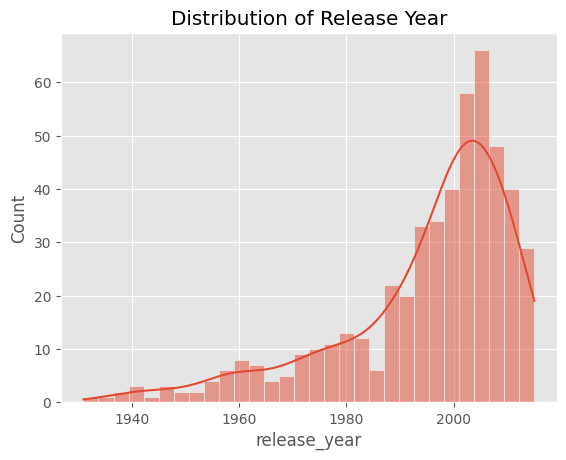

In [47]:
# Plot the distribution of release year
sns.histplot(df.release_year, bins=30, kde=True)
plt.title('Distribution of Release Year');

- The distribution is left skewed
- Most of the values falls in the year range of 1990 to 2002

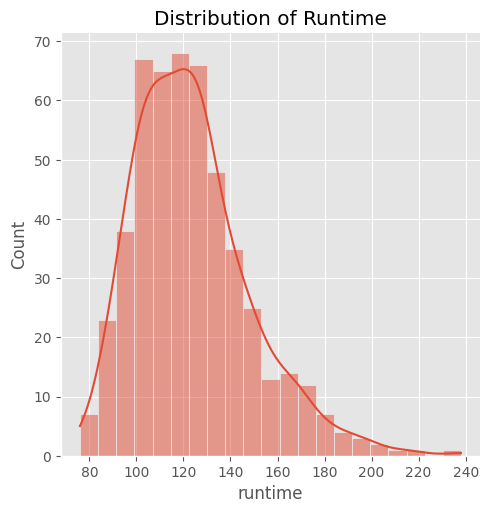

In [48]:
# Plot the distribution of Runtime
sns.displot(df.runtime, kde = True)
plt.title('Distribution of Runtime');

- The Distribution is slightly Right Skewed
- Most of the value falls in the range of 100 to 140

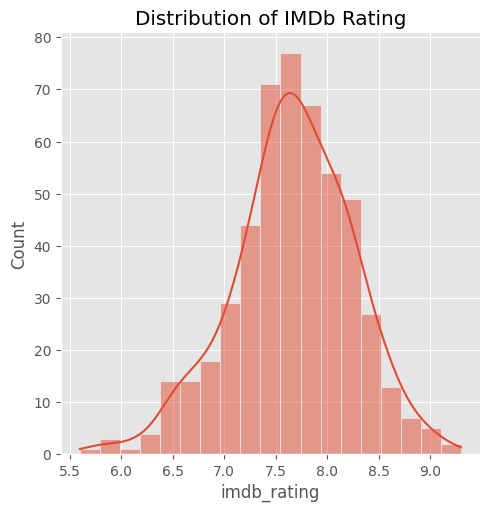

In [49]:
# Plot the Distrinition of IMDb Rating
sns.displot(df.imdb_rating, kde=True)
plt.title('Distribution of IMDb Rating');

- The distribution is almost Normal
- Most the of the values are in the range of 7.1 to 8.3 approximatly

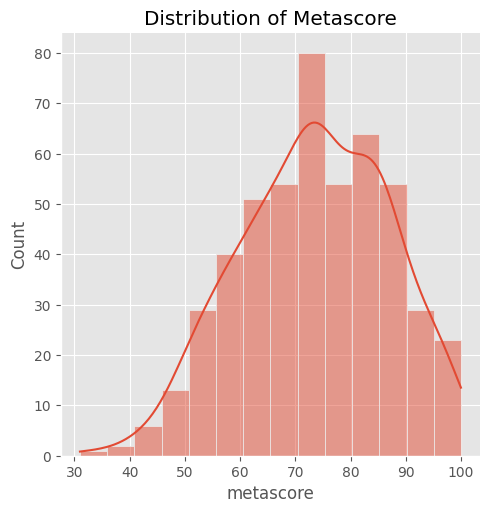

In [50]:
# Plot the distribution of Metascore
sns.displot(df.metascore, kde=True)
plt.title('Distribution of Metascore');

- The Distribution is slightly left skewed 
- Most of the values are in the range of 60 to 90

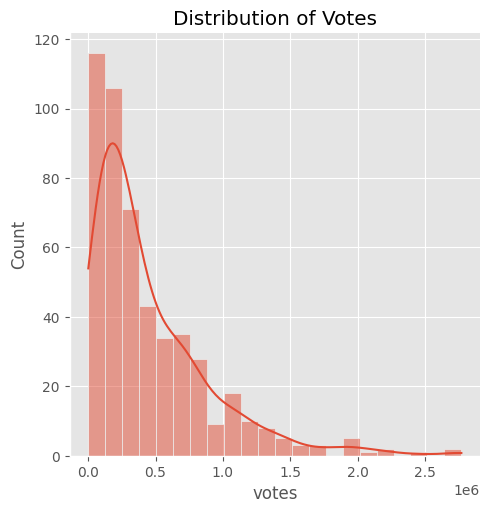

In [51]:
# Plot the distribution of Votes
sns.displot(df.votes, kde=True)
plt.title('Distribution of Votes');

- The Distirbution is Right Skewed 
- There might be some possible outliears, Let's find out

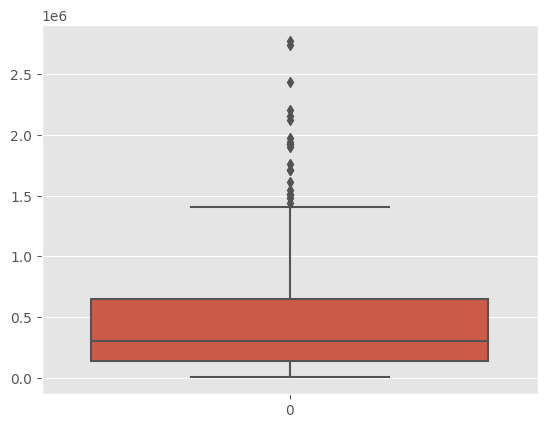

In [52]:
sns.boxplot(df.votes);

In [53]:
# let's find those outliears with iqr method
q1 = df.votes.quantile(0.25) # 1st quartile
q3 = df.votes.quantile(0.75) # 3rd quartile

# find iqr (q3 - q1)
iqr = q3 - q1

print(f"""
votes

q1 : {q1}
q3 : {q3}
iqr : {iqr}
""")


votes

q1 : 136944.25
q3 : 647079.25
iqr : 510135.0



In [54]:
# Fetch all the movies having votes greater than q3 of the total distribution
df[df.votes > q3]

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,1929034,134.97
1,The Silence of the Lambs,1991,A,118,"Crime, Drama, Thriller",8.6,86.0,A young F.B.I. cadet must receive the help of ...,Jonathan Demme,1479099,130.74
2,Star Wars: Episode V - The Empire Strikes Back,1980,UA,124,"Action, Adventure, Fantasy",8.7,82.0,After the Rebels are overpowered by the Empire...,Irvin Kershner,1331089,290.48
3,The Shawshank Redemption,1994,A,142,Drama,9.3,82.0,"Over the course of several years, two convicts...",Frank Darabont,2771093,28.34
4,The Shining,1980,A,146,"Drama, Horror",8.4,66.0,A family heads to an isolated hotel for the wi...,Stanley Kubrick,1058395,44.02
...,...,...,...,...,...,...,...,...,...,...,...
439,The Amazing Spider-Man,2012,UA,136,"Action, Adventure, Sci-Fi",6.9,66.0,After Peter Parker is bitten by a genetically ...,Marc Webb,678417,262.03
441,The Hangover,2009,UA,100,Comedy,7.7,73.0,Three buddies wake up from a bachelor party in...,Todd Phillips,813998,277.32
455,Sherlock Holmes,2009,16,128,"Action, Adventure, Mystery",7.6,57.0,Detective Sherlock Holmes and his stalwart par...,Guy Ritchie,651492,209.03
457,I Am Legend,2007,A,101,"Action, Drama, Horror",7.2,65.0,Years after a plague kills most of humanity an...,Francis Lawrence,785042,256.39


In [55]:
print(f"So there are total {df[df.votes > q3].shape[0]} movies which is having votes greater than 3rd Quartile of the distribution")

So there are total 125 movies which is having votes greater than 3rd Quartile of the distribution


- Votes can be a Important column for each movies .
- The TRP of each movie might depends on the number of votes.
- So it's better not to remove the outliears now.

In [56]:
# Which movie got the highest number of votes?
df[df.votes == df.votes.max()]

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
3,The Shawshank Redemption,1994,A,142,Drama,9.3,82.0,"Over the course of several years, two convicts...",Frank Darabont,2771093,28.34


In [57]:
# Which movie got the lowest vote?
df[df.votes == df.votes.min()] 

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
432,Marie-Jo et ses 2 amours,2002,A,124,"Drama, Romance",6.5,74.0,"Having reached middle age, a woman must choose...",Robert Guédiguian,814,52.63


In [58]:
# Let's check the correlation between votes and imdb rating
df['imdb_rating'].corr(df['votes'])

0.6519906492145823

- The variable `imdb_rating` and `votes` certainly have positive correlation. We will check correlation with more variables later

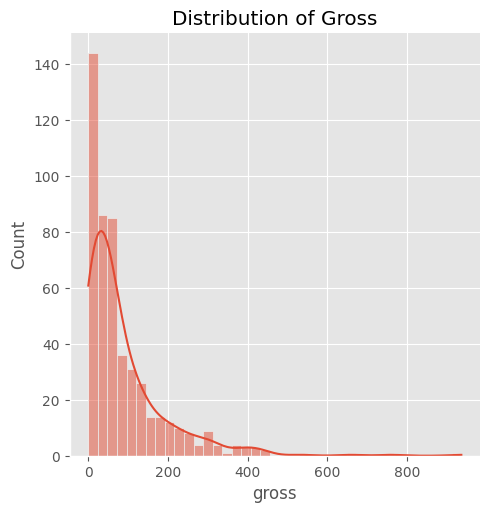

In [59]:
# Plot the distribution of Gross
sns.displot(df.gross, kde=True)
plt.title('Distribution of Gross');

- The distribution is Right Skewed.
- And Like `votes` the `gross` column might have possible outliears.

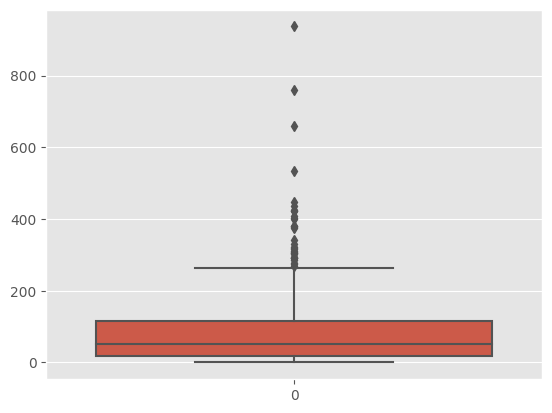

In [60]:
# Create a boxplot on the gross 
sns.boxplot(df.gross);

In [61]:
# Let's detect those outliears with the same IQR methods
q1 = df.gross.quantile(0.25) # 1st quartile
q3 = df.gross.quantile(0.75) # 3rd quartile

# find iqr (q3 - q1)
iqr = q3 - q1

print(f"""
gross

q1 : {q1}
q3 : {q3}
iqr : {iqr}
""")


gross

q1 : 18.535
q3 : 116.0475
iqr : 97.5125



In [62]:
# Fetch all the rows having gross value more than q3 of the distribution
df[df.gross > q3]

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,1929034,134.97
1,The Silence of the Lambs,1991,A,118,"Crime, Drama, Thriller",8.6,86.0,A young F.B.I. cadet must receive the help of ...,Jonathan Demme,1479099,130.74
2,Star Wars: Episode V - The Empire Strikes Back,1980,UA,124,"Action, Adventure, Fantasy",8.7,82.0,After the Rebels are overpowered by the Empire...,Irvin Kershner,1331089,290.48
7,Raiders of the Lost Ark,1981,A,115,"Action, Adventure",8.4,85.0,"In 1936, archaeologist and adventurer Indiana ...",Steven Spielberg,1004765,248.16
8,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,1900873,377.85
...,...,...,...,...,...,...,...,...,...,...,...
483,Prometheus,2012,A,124,"Adventure, Mystery, Sci-Fi",7.0,64.0,"Following clues to the origin of mankind, a te...",Ridley Scott,625162,126.48
484,Lethal Weapon 2,1989,A,114,"Action, Crime, Thriller",7.2,70.0,Riggs and Murtaugh are on the trail of South A...,Richard Donner,183117,147.25
485,Die Hard 2,1990,A,124,"Action, Thriller",7.1,67.0,John McClane attempts to avert disaster as rog...,Renny Harlin,372104,117.54
490,Mamma Mia!,2008,A,108,"Comedy, Musical, Romance",6.5,51.0,The story of a bride-to-be trying to find her ...,Phyllida Lloyd,259634,144.13


In [63]:
print(f"So there are total {df[df.gross > q3].shape[0]} movies which is having values greater than 3rd Quartile of the distribution")

So there are total 125 movies which is having values greater than 3rd Quartile of the distribution


- So the gross column also have 125 rows/movies having values greater than q3.
- And Most of the movies within those 125 rows are also same.

In [64]:
# Check the correlation between votes and gross
df['votes'].corr(df['gross'])

0.515794973465263

In [65]:
# Check the correlation between imdb_rating and gross
df['gross'].corr(df['imdb_rating'])

0.16039809117800696

In [66]:
# Let's check the Correlation onthe overall dataset (on current Numerical Column)
df.corr()

,release_year,runtime,imdb_rating,metascore,votes,gross
release_year,1.000000,-0.013449,-0.308571,-0.385280,0.148373,0.201984
runtime,-0.013449,1.000000,0.326058,0.123335,0.302874,0.249920
imdb_rating,-0.308571,0.326058,1.000000,0.539121,0.651991,0.160398
metascore,-0.385280,0.123335,0.539121,1.000000,0.186929,0.036329
votes,0.148373,0.302874,0.651991,0.186929,1.000000,0.515795
gross,0.201984,0.249920,0.160398,0.036329,0.515795,1.000000


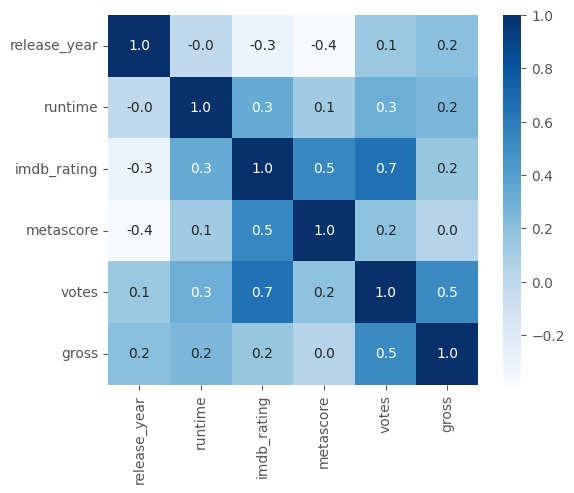

In [67]:
# create a heatmap of correlation
sns.heatmap(df.corr(), cmap="Blues", annot=True, square=True, fmt = '.1f');

+ Based on the plot we can see that `imdb_rating` have the heighest correleation with `votes` approx 0.7 and with `metascore` approx 0.5

### Categorical Columns

- Let's check the genre column
- Create a Wordcloud for genre column to see the most occured genre
- Create a function to search movies by genre

In [68]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud, STOPWORDS

In [69]:
def gen_wc(text):
    wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=50, max_words=50, background_color='grey', colormap='flag').generate(" ".join(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off');

In [70]:
# wordcloud = WordCloud(max_font_size=50, max_words=50, background_color='white', colormap='flag').generate(df.genre)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off');

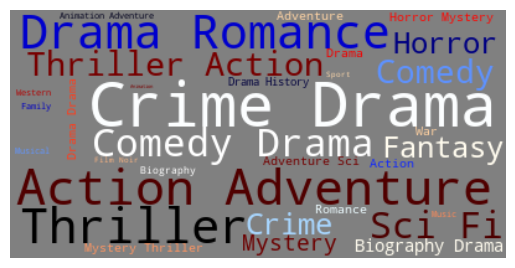

In [71]:
gen_wc(df['genre'])

- In the above plot the bigger and bolder values are the most occured value in the entire dataset

In [72]:
# Search for Thriller Movies
df[df.genre.str.contains('Thriller')]

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
1,The Silence of the Lambs,1991,A,118,"Crime, Drama, Thriller",8.6,86.0,A young F.B.I. cadet must receive the help of ...,Jonathan Demme,1479099,130.74
25,Die Hard,1988,A,132,"Action, Thriller",8.2,72.0,A New York City police officer tries to save h...,John McTiernan,906801,83.01
32,Rear Window,1954,U,112,"Mystery, Thriller",8.5,100.0,A photographer in a wheelchair spies on his ne...,Alfred Hitchcock,505178,36.76
37,Memento,2000,UA,113,"Mystery, Thriller",8.4,83.0,A man with short-term memory loss attempts to ...,Christopher Nolan,1273320,25.54
47,Kill Bill: Vol. 1,2003,A,111,"Action, Crime, Thriller",8.2,69.0,"After awakening from a four-year coma, a forme...",Quentin Tarantino,1148679,70.10
...,...,...,...,...,...,...,...,...,...,...,...
485,Die Hard 2,1990,A,124,"Action, Thriller",7.1,67.0,John McClane attempts to avert disaster as rog...,Renny Harlin,372104,117.54
486,The Crazies,2010,18,101,"Horror, Thriller",6.5,56.0,"After a strange and insecure plane crash, an u...",Breck Eisner,125759,39.12
493,Final Destination,2000,A,98,"Horror, Thriller",6.7,36.0,Alex Browning is among a group of high school ...,James Wong,267629,53.33
497,Fear,1996,Not Rated,97,"Drama, Thriller",6.2,51.0,"When Nicole met David; handsome, charming, aff...",James Foley,51603,20.75


### Create function to search movies by genre

In [73]:
def searchByGenre(genre):
    return df[df.genre.str.contains(genre)]

In [74]:
# Search for Sci-Fi movies
searchByGenre('Sci-Fi')

,movie_title,release_year,film_rating,runtime,genre,imdb_rating,metascore,description,director,votes,gross
12,Aliens,1986,U,137,"Action, Adventure, Sci-Fi",8.4,84.0,"Decades after surviving the Nostromo incident,...",James Cameron,737639,85.16
14,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,Christopher Nolan,2436924,292.58
16,Alien,1979,R,117,"Horror, Sci-Fi",8.5,89.0,The crew of a commercial spacecraft encounters...,Ridley Scott,910676,78.90
18,Blade Runner,1982,UA,117,"Action, Drama, Sci-Fi",8.1,84.0,A blade runner must pursue and terminate four ...,Ridley Scott,793988,32.87
23,Terminator 2: Judgment Day,1991,A,137,"Action, Sci-Fi",8.6,75.0,"A cyborg, identical to the one who failed to k...",James Cameron,1132155,204.84
34,Back to the Future,1985,U,116,"Adventure, Comedy, Sci-Fi",8.5,87.0,"Marty McFly, a 17-year-old high school student...",Robert Zemeckis,1250961,210.61
46,2001: A Space Odyssey,1968,U,149,"Adventure, Sci-Fi",8.3,84.0,After uncovering a mysterious artifact buried ...,Stanley Kubrick,690944,56.95
58,Children of Men,2006,A,109,"Action, Drama, Sci-Fi",7.9,84.0,"In 2027, in a chaotic world in which women hav...",Alfonso Cuarón,514050,35.55
61,The Prestige,2006,U,130,"Drama, Mystery, Sci-Fi",8.5,66.0,"After a tragic accident, two stage magicians i...",Christopher Nolan,1377449,53.09
62,V for Vendetta,2005,UA,132,"Action, Drama, Sci-Fi",8.2,62.0,"In a future British dystopian society, a shado...",James McTeigue,1146748,70.51


### Explore the `film_rating` column

In [75]:
# check the unique values with number of times it occured
df.film_rating.value_counts()

A            203
UA           120
U             94
R             54
PG-13          6
Not Rated      4
18             4
13             2
15+            2
G              2
UA 16+         2
16             2
PG             1
All            1
7              1
12+            1
Unrated        1
Name: film_rating, dtype: int64

#### `Film_rating` simplified

- While scraping Data we got A instead of R
- Let's map all A to R

In [76]:
df.film_rating = df.film_rating.replace({'A': 'R'})

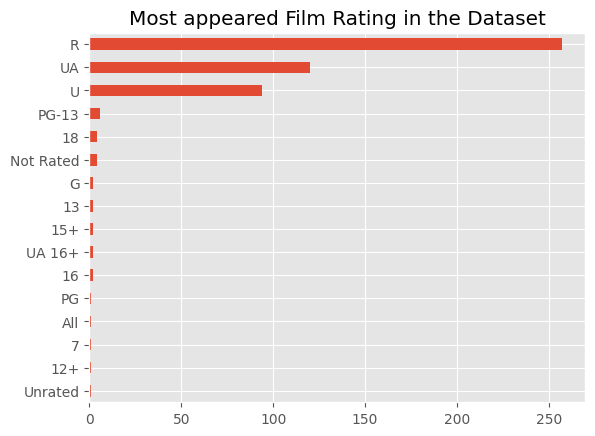

In [77]:
ax = df.film_rating.value_counts().plot(kind='barh', title='Most appeared Film Rating in the Dataset')
ax.invert_yaxis();

- As we can see that the most appeard Film Rating in the Dataset: R, UA, U

## Top 5 Business Question

1. Top 10 movies by `imdb_rating`

In [78]:
top_10_movies_imdb = pd.DataFrame(df.groupby('imdb_rating')['movie_title', 'imdb_rating'].head(10))

In [79]:
top_10_movies_imdb.sort_values('imdb_rating', ascending=False).head(10).reset_index(drop=True)

,movie_title,imdb_rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,Schindler's List,9.0
3,12 Angry Men,9.0
4,The Lord of the Rings: The Return of the King,9.0
5,The Dark Knight,9.0
6,The Godfather Part II,9.0
7,Pulp Fiction,8.9
8,"Il buono, il brutto, il cattivo",8.8
9,Forrest Gump,8.8


2. Top 10 Movies by `votes`

In [80]:
top_10_movies_votes = pd.DataFrame(df.groupby('votes')['movie_title', 'imdb_rating', 'votes'].head(10))

In [81]:
top_10_movies_votes.sort_values('votes', ascending=False).head(10).reset_index(drop=True)

,movie_title,imdb_rating,votes
0,The Shawshank Redemption,9.3,2771093
1,The Dark Knight,9.0,2745944
2,Inception,8.8,2436924
3,Fight Club,8.8,2207234
4,Forrest Gump,8.8,2155260
5,Pulp Fiction,8.9,2126874
6,The Matrix,8.7,1973123
7,Interstellar,8.7,1944990
8,The Lord of the Rings: The Fellowship of the Ring,8.8,1929235
9,The Godfather,9.2,1929034


3. Top 10 Movies by `metascore`

In [82]:
top_10_movies_meta = pd.DataFrame(df.groupby('metascore')['movie_title', 'metascore'].head(10))

In [83]:
top_10_movies_meta.sort_values('metascore', ascending=False).head(10).reset_index(drop=True)

,movie_title,metascore
0,The Godfather,100.0
1,Vertigo,100.0
2,Notorious,100.0
3,Rear Window,100.0
4,Citizen Kane,100.0
5,Casablanca,100.0
6,Lawrence of Arabia,100.0
7,City Lights,99.0
8,Singin' in the Rain,99.0
9,Some Like It Hot,98.0


4. Movie trends by `release_year`

In [84]:
total_movies_by_year = pd.DataFrame(df.groupby('release_year')['movie_title'].count())

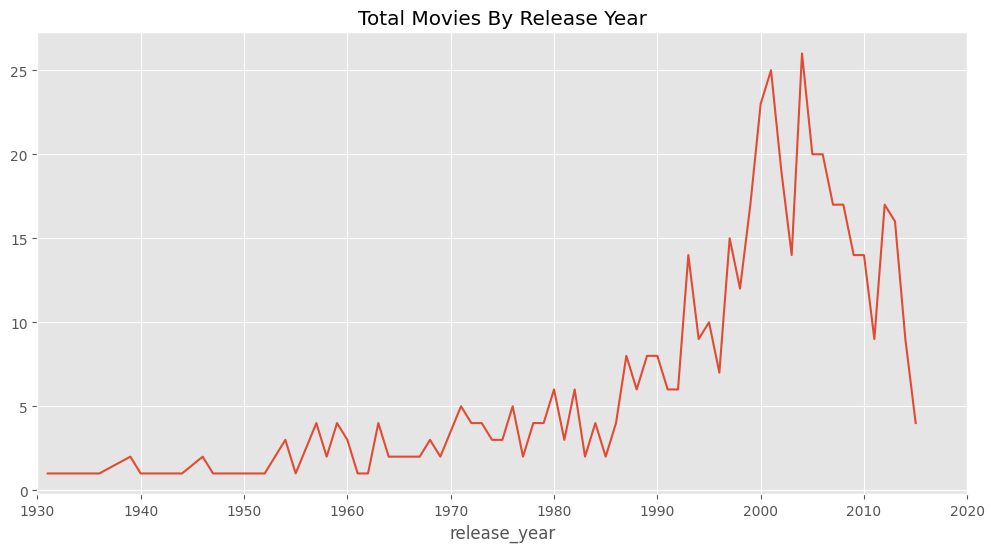

In [85]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(total_movies_by_year, legend=False)
ax.set_title('Total Movies By Release Year')
ax.set_xlim(1930, 2020);

5. TOP 10 directors by total number of movies

In [86]:
top_10_dir_by_movies = pd.DataFrame(df.groupby('director')['movie_title'].count()).sort_values('movie_title', ascending=False).head(10)

In [87]:
top_10_dir_by_movies.rename(columns=({'movie_title': 'total_movies'}))

,total_movies
director,
Steven Spielberg,12
Martin Scorsese,9
Peter Jackson,8
Christopher Nolan,8
Quentin Tarantino,8
Ridley Scott,7
Alfred Hitchcock,7
David Fincher,6
Tim Burton,6


- Steven Spielberg have directed the highest number of movies in the dataset 